# Installing Dependencies

In [1]:
!pip install rasterio
!pip install matplotlib
!pip install plotly

# Loading Extensions
*autoreload:* the modules automatically before executing the line of code typed

In [2]:
%load_ext autoreload
%autoreload 2

# Input Validations

In [3]:
# Validations
from datetime import datetime

def viz_type_validate(input_val):
    try:
      test = int(input_val)
      if(not(0 < test < 6)):
          print("Re-Enter correct selection.")
    except:
      print("Re-Enter correct selection.")

def input_seasonal_validate(input_val):
    possible_inputs = ["spring", "summer", "autumn", "winter"]
    if (not(input_val in possible_inputs)):
         print("Re-Enter correct selection.")

def input_monthly_validate(input_val):
    try:
      test = int(input_val)
      if(not(0 < test < 13)):
          print("Re-Enter correct selection.")
    except:
      print("Re-Enter correct selection.")

def input_diurnal_validate(input_val):
    try:
      test = int(input_val)
      if(not(0 <= test < 24)):
          print("Re-Enter correct selection.")
    except:
      print("Re-Enter correct selection.")

def input_daily_validate(input_val):
    # 2013-01-01 to 
    upper_limit = datetime.fromisoformat("2013-12-31")
    lower_limit = datetime.fromisoformat("2013-01-01")
    try:
      test = datetime.fromisoformat(input_val)
      if(not(lower_limit <= test <= upper_limit)):
          print("Re-Enter correct selection.")
    except:
      print("Re-Enter correct selection.")


# Taking Inputs
*(Note: use lower case for the inputs)*

### Input for the visualization type 
(global input)

In [4]:
viz_type_num_global = input("Enter one of the following visualization type: (Hint: 1 - 5) \n1.full \n2.seasonal \n3.monthly \n4.diurnal \n5.daily\n ==>")
viz_type_validate(viz_type_num_global)

Enter one of the following visualization type: (Hint: 1 - 5) 
1.full 
2.seasonal 
3.monthly 
4.diurnal 
5.daily
 ==> 3


### Additional Input for the visualization type selected 
(global input)

In [5]:
def handle_input_full():
    # do not need an input
    return False
    
def handle_input_seasonal():
    u_input = input("Enter the Season \n1. spring \n2. summer \n3. autumn \n4. winter \n(Hint: spring)\n==>")
    input_seasonal_validate(u_input)
    return u_input

def handle_input_monthly():
    u_input = input("Enter the Month (Hint: 01 - 12)\n==>")
    input_monthly_validate(u_input)
    return u_input

def handle_input_diurnal():
    u_input = input("Enter the Durinals (Hint: 00 - 23)\n==>")
    input_diurnal_validate(u_input)
    return u_input

def handle_input_daily():
    u_input = input("Enter the a date yyyy-mm-dd format (Hint: from 2013-01-01 to 2013-12-31 only)\n==>")
    input_daily_validate(u_input)
    return u_input

input_switches = {
    "full" : handle_input_full,
    "seasonal" : handle_input_seasonal,
    "monthly" : handle_input_monthly,
    "diurnal" : handle_input_diurnal,
    "daily" : handle_input_daily
}

def get_viz_type(number):
    num_to_viz_map = {
        1: "full", 
        2: "seasonal", 
        3: "monthly", 
        4: "diurnal", 
        5: "daily"
    }
    return num_to_viz_map[int(number)]

viz_type_global = get_viz_type(viz_type_num_global)
type_data_ip_global = input_switches[viz_type_global]()

Enter the Month (Hint: 01 - 12)
==> 01


# Visualization of raw GEOTIFF using rasterio

### Importing dependencies

In [6]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot
from datetime import datetime

### Visualization handlers and its helpers
works based off the global inputs

Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRMC_LIS_FRD_cogs/VHRMC_LIS_FRD_Month_1.0_co.tif.msk: 403
Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRMC_LIS_FRD_cogs/VHRMC_LIS_FRD_Month_1.0_co.tif.MSK: 403


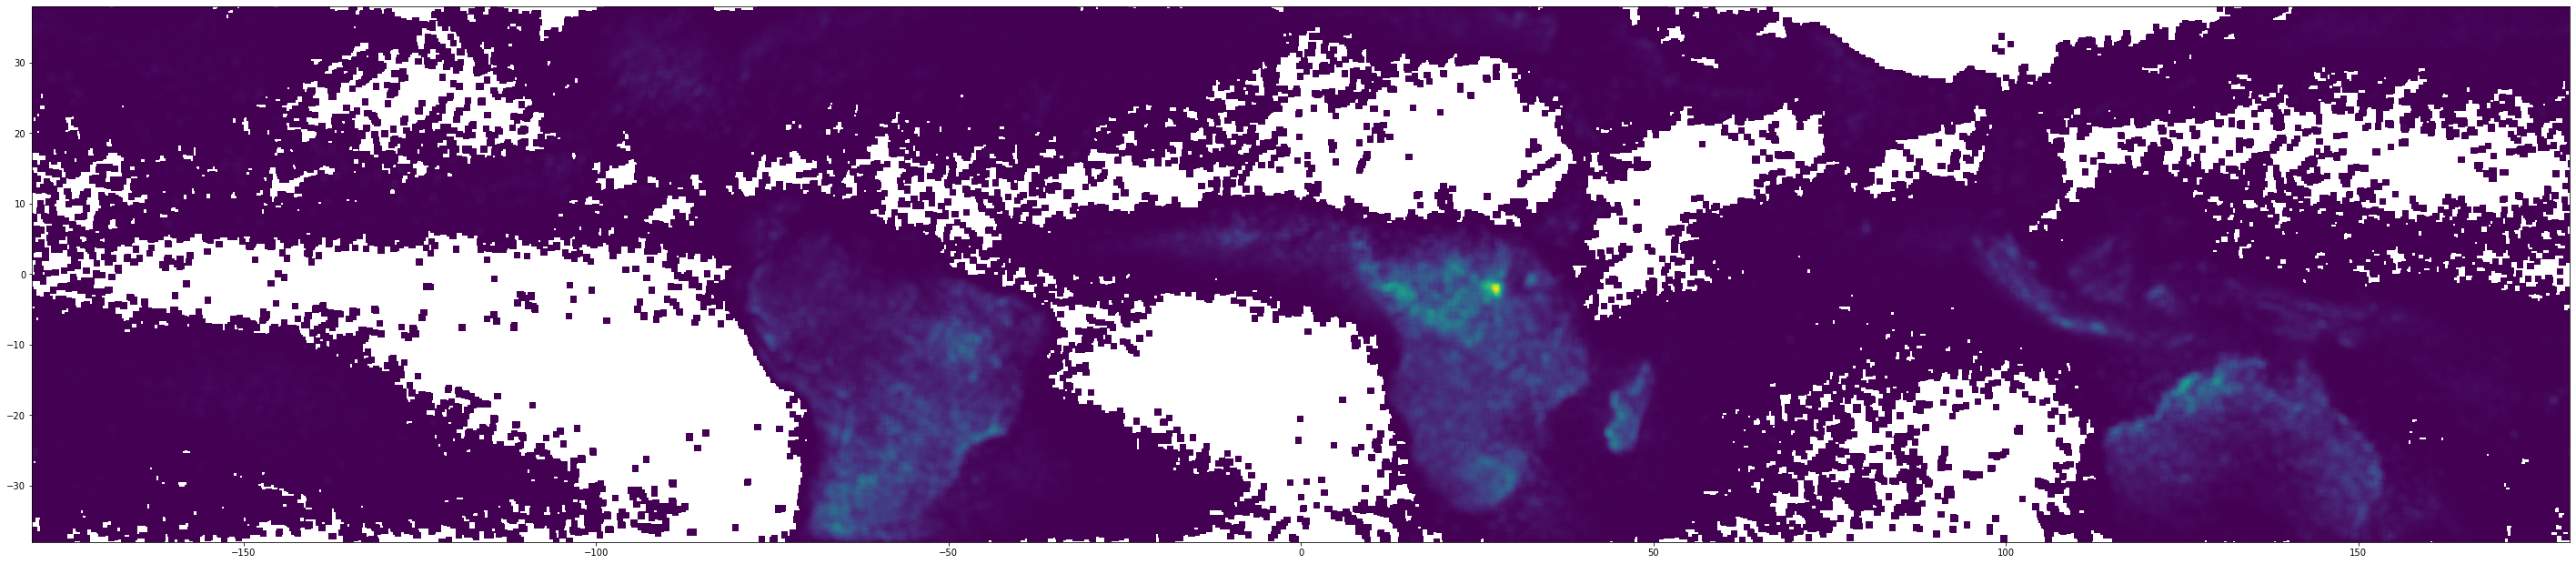

Geotiff url: https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRMC_LIS_FRD_cogs/VHRMC_LIS_FRD_Month_1.0_co.tif


In [7]:
def visuzalize_GEOTIFF(layer_url):
    dataset = rasterio.open(layer_url)
    pyplot.figure(figsize=(50, 25))
    show(dataset)

def formulate_url_geotiff(type_c, date_c):
    baseurl = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS"

    type_codes = {
        "full": "VHRFC",
        "seasonal": "VHRSC",
        "monthly" : "VHRMC",
        "diurnal" : "VHRDC",
        "daily" : "VHRAC"
    }
    
    type_data_types = {
        "full" : "Full",
        "seasonal" : "Season",
        "monthly" : "Month",
        "diurnal" : "Time",
        "daily" : "Time"
    }

    # The URL to fetch geotif image according to the input types
    return f'{baseurl}/{type_codes[type_c]}_LIS_FRD_cogs/{type_codes[type_c]}_LIS_FRD_{type_data_types[type_c]}_{date_c}.0_co.tif'
    
# what handlers do is:
    # looks for the global date
    # manage the date
    # Formulate the url
    # use url for visuzalization

def handle_full_geotiff():
    viz_date = "201301"
    viz_type = "full"
    # only single file, so no need to formulate url
    viz_url = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRFC_LIS_FRD_co.tif"
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)

def handle_seasonal_geotiff():
    u_input = type_data_ip_global
    season_date_map = { 
        "spring": "1",
        "summer": "2",
        "autumn": "3",
        "winter": "4"
    }
    viz_date = season_date_map[u_input]
    viz_type = "seasonal"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)

def handle_monthly_geotiff():
    u_input = type_data_ip_global
    viz_date = int(u_input)
    viz_type = "monthly"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)  


def handle_diurnal_geotiff():
    u_input = type_data_ip_global
    viz_date = int(u_input)
    viz_type = "diurnal"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)
    
def handle_daily_geotiff():
    u_input = type_data_ip_global
    viz_date = datetime.fromisoformat(u_input).timetuple().tm_yday  # returns 1 for January 1st
    viz_type = "daily"
    viz_url = formulate_url_geotiff(viz_type, viz_date)
    visuzalize_GEOTIFF(viz_url)
    print("Geotiff url: " + viz_url)

viz_handle_switches_geotiff = {
    "full" : handle_full_geotiff,
    "seasonal" : handle_seasonal_geotiff,
    "monthly" : handle_monthly_geotiff,
    "diurnal" : handle_diurnal_geotiff,
    "daily" : handle_daily_geotiff
}

url_new = viz_handle_switches_geotiff[viz_type_global]()

# Visualization of COG overlayed over mapbox

### Importing dependencies

In [8]:
import plotly.io as pio
import plotly.express as px
import pandas as pd

### Set default *(plotly)* renderer
according to the env the notebook is running.
*Needed to visualize the Mapbox*

In [9]:
# pio.renderers.default = 'colab'
pio.renderers.default = 'jupyterlab'

### Visualization handlers and its helpers

works based off the global inputs

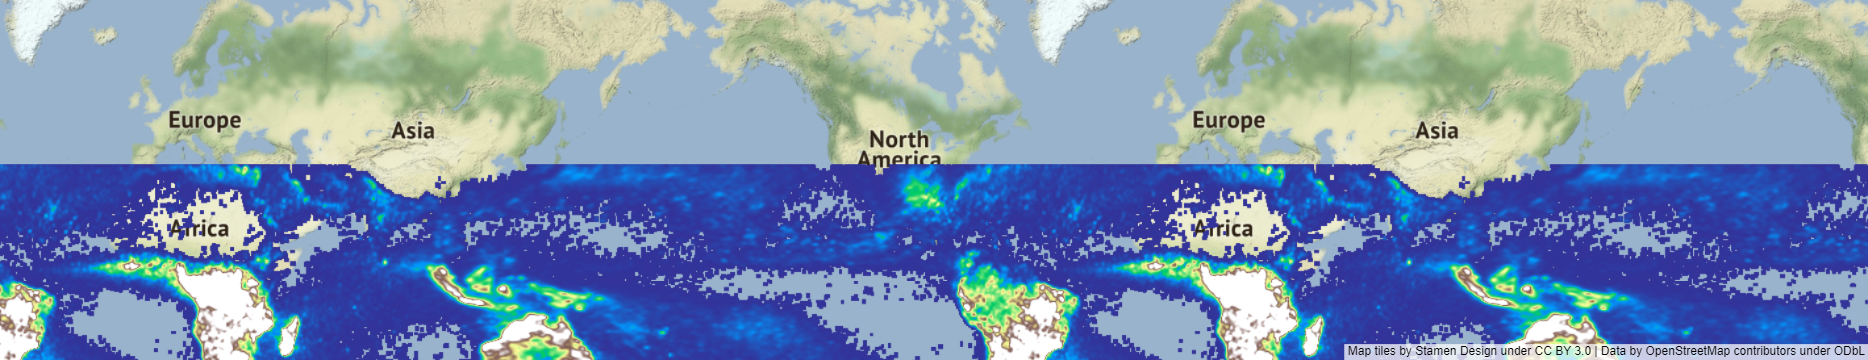

In [10]:
def visuzalize_COG(layer_url):
    # seed value, for mapbox to load in colab
    df = pd.DataFrame([[1001, 5.3],[1001, 5.3]])
    df.columns = ["flips", "unemp"]
    fig = px.choropleth_mapbox(
                                df, 
                                color='unemp',
                                color_continuous_scale="Viridis",
                                range_color=(0, 12),
                                mapbox_style="carto-positron",
                                zoom=4, center = {"lat": 33.543682, "lon": -86.779633},
                                opacity=0.5,
                              )

    fig.update_layout(
        mapbox_layers=[
            {
                "sourcetype": "raster",
                "source": [layer_url]
            }
          ])
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    # print(fig.layout.mapbox.layers)
    fig.update_layout(mapbox_style="stamen-terrain")
    fig.layout.mapbox.zoom = 1
    fig.show()

#apply switch cases:

    
def formulate_url(type_c, date_c):
    cog_base_url = "https://wug8w3fg42.execute-api.us-west-2.amazonaws.com/development/singleband"
    
    type_date_url_end_mapping = {
        "full": "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.325,23.426]",
        "seasonal": "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]",
        "monthly" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]",
        "diurnal" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0,0.002]",
        "daily" : "LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]"
    }

    type_codes = {
        "full": "VHRFC",
        "seasonal": "VHRSC",
        "monthly" : "VHRMC",
        "diurnal" : "VHRDC",
        "daily" : "VHRAC"
    }
    
    cog_url_build = f"{type_codes[type_c]}/{date_c}"

    return f"{cog_base_url}/{cog_url_build}/{type_date_url_end_mapping[type_c]}"

# what handlers do is:
    # get the global date
    # manage the date
    # Formulate the url
    # use url for visuzalization

def handle_full():
    viz_date = "201301"
    viz_type = "full"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)

def handle_seasonal():
    u_input = type_data_ip_global
    season_date_map = { 
        "spring": "2013_03_01",
        "summer": "2013_07_01",
        "autumn": "2013_10_01",
        "winter": "2013_12_01"
    }
    viz_date = season_date_map[u_input]
    viz_type = "seasonal"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)

def handle_monthly():
    u_input = type_data_ip_global
    viz_date = f"2013{u_input}"
    viz_type = "monthly"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)

def handle_diurnal():
    u_input = type_data_ip_global
    season_date_map = {
        "00": "2013_01_01" , "01": "2013_01_15" , "02": "2013_02_01" , "03": "2013_02_15" , "04": "2013_03_01" , "05": "2013_03_15" ,
        "06": "2013_04_01" , "07": "2013_04_15" , "08": "2013_05_01" , "09": "2013_05_15" , "10": "2013_06_01" , "11": "2013_06_15" ,
        "12": "2013_07_01" , "13": "2013_07_15" , "14": "2013_08_01" , "15": "2013_08_15" , "16": "2013_09_01" , "17": "2013_09_15" ,
        "18": "2013_10_01" , "19": "2013_10_15" , "20": "2013_11_01" , "21": "2013_11_15" , "22": "2013_12_01" , "23": "2013_12_15"
    }
    viz_date = season_date_map[u_input]
    viz_type = "diurnal"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)

def handle_daily():
    u_input = type_data_ip_global
    viz_date = u_input.replace('-', '_')
    viz_type = "daily"
    viz_url = formulate_url(viz_type, viz_date)
    visuzalize_COG(viz_url)

viz_handle_switches_cog = {
    "full" : handle_full,
    "seasonal" : handle_seasonal,
    "monthly" : handle_monthly,
    "diurnal" : handle_diurnal,
    "daily" : handle_daily
}

viz_handle_switches_cog[viz_type_global]()

If the visualization is not showing, use appropriate `pio.renderers.default`, according to the platform that the notebook is running. (Hint. for `Jupyterlab`, `pio.renderers.default = 'jupyterlab'`, for `Google colab`, `pio.renderers.default = 'colab'`)